In [1]:
print("hi")

hi


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate loading a dataset (manually created)
try:
    data = {
        'Date': pd.date_range(start='2025-01-01', periods=6, freq='ME'),
        'Region': ['North', 'South', 'East', 'West', 'North', 'South'],
        'Sales': [2500, 2700, 1800, 2200, np.nan, 2600],
        'Units_Sold': [20, 25, 15, 18, 22, np.nan]
    }
    df = pd.DataFrame(data)
    print("all the dataset:")
    print(df)
    print("First 5 rows of the dataset:")
    print(df.head())
except Exception as e:
    print("Error loading dataset:", e)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Clean the dataset (fill missing values)
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Units_Sold'] = df['Units_Sold'].fillna(df['Units_Sold'].mean())



all the dataset:
        Date Region   Sales  Units_Sold
0 2025-01-31  North  2500.0        20.0
1 2025-02-28  South  2700.0        25.0
2 2025-03-31   East  1800.0        15.0
3 2025-04-30   West  2200.0        18.0
4 2025-05-31  North     NaN        22.0
5 2025-06-30  South  2600.0         NaN
First 5 rows of the dataset:
        Date Region   Sales  Units_Sold
0 2025-01-31  North  2500.0        20.0
1 2025-02-28  South  2700.0        25.0
2 2025-03-31   East  1800.0        15.0
3 2025-04-30   West  2200.0        18.0
4 2025-05-31  North     NaN        22.0

Data Types:
Date          datetime64[ns]
Region                object
Sales                float64
Units_Sold           float64
dtype: object

Missing Values:
Date          0
Region        0
Sales         1
Units_Sold    1
dtype: int64


In [11]:
# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Group by Region
grouped = df.groupby('Region')[['Sales', 'Units_Sold']].mean()
print("\nAverage Sales and Units Sold by Region:")
print(grouped)

# Pattern observations
print("\nInsights:")
if grouped['Sales'].idxmax() != grouped['Sales'].idxmin():
    print(f"- The region with the highest average sales is {grouped['Sales'].idxmax()}.")
    print(f"- The region with the lowest average sales is {grouped['Sales'].idxmin()}.")
else:
    print("- All regions have similar average sales.")



Descriptive Statistics:
                      Date        Sales  Units_Sold
count                    6     6.000000    6.000000
mean   2025-04-15 08:00:00  2360.000000   20.000000
min    2025-01-31 00:00:00  1800.000000   15.000000
25%    2025-03-07 18:00:00  2240.000000   18.500000
50%    2025-04-15 00:00:00  2430.000000   20.000000
75%    2025-05-23 06:00:00  2575.000000   21.500000
max    2025-06-30 00:00:00  2700.000000   25.000000
std                    NaN   326.190129    3.405877

Average Sales and Units Sold by Region:
         Sales  Units_Sold
Region                    
East    1800.0        15.0
North   2430.0        21.0
South   2650.0        22.5
West    2200.0        18.0

Insights:
- The region with the highest average sales is South.
- The region with the lowest average sales is East.


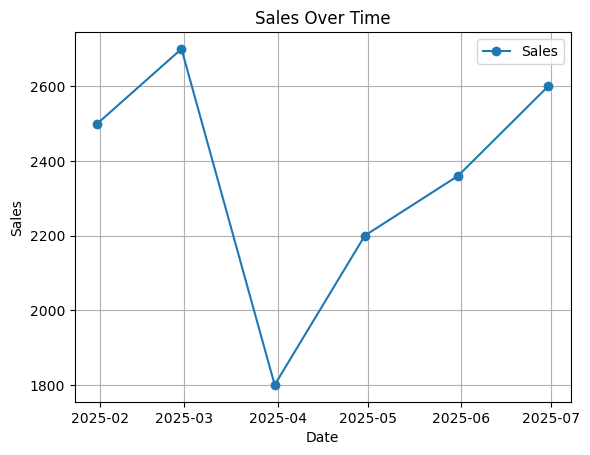

In [12]:
# Line Chart: Sales over Time
plt.plot(df['Date'], df['Sales'], marker='o', label='Sales')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


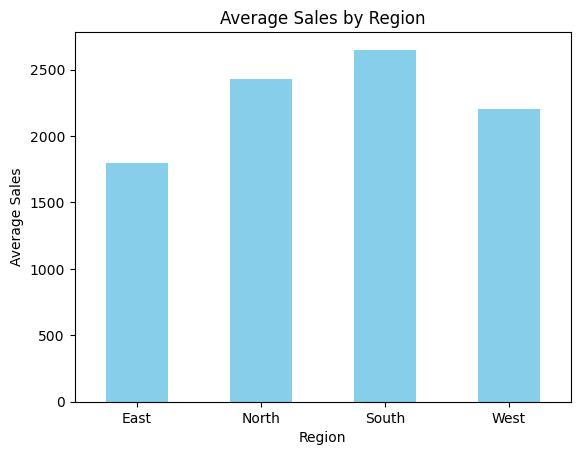

In [13]:
# Bar Chart: Average Sales by Region
grouped['Sales'].plot(kind='bar', color='skyblue')
plt.title("Average Sales by Region")
plt.xlabel("Region")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()


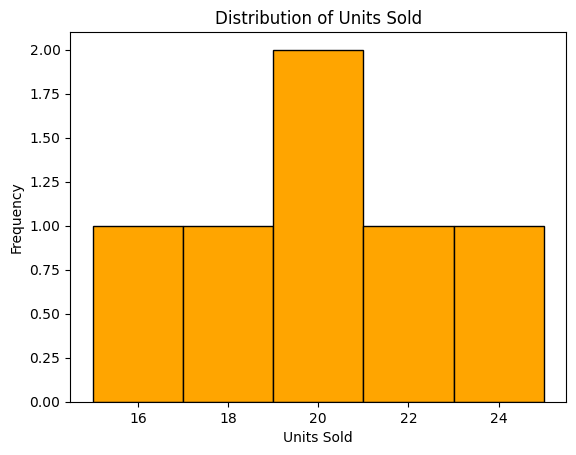

In [14]:
# Histogram: Distribution of Units Sold
df['Units_Sold'].plot(kind='hist', bins=5, color='orange', edgecolor='black')
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()


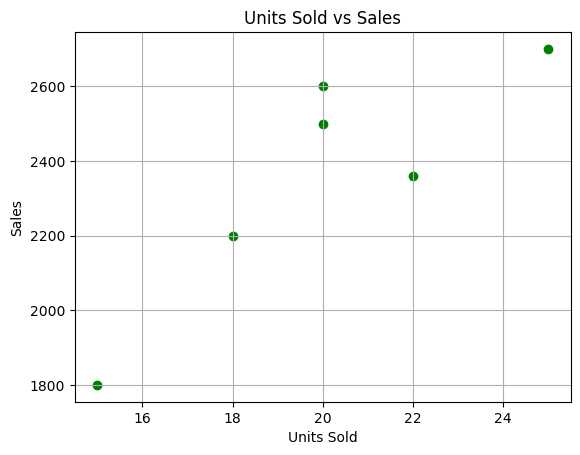

In [15]:
# Scatter Plot: Units Sold vs Sales
plt.scatter(df['Units_Sold'], df['Sales'], color='green')
plt.title("Units Sold vs Sales")
plt.xlabel("Units Sold")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
